In [1]:
import pandas as pd

In [2]:
logD=pd.read_excel('Downloads/aiml_test_data 1.xlsx')

In [3]:
logD.head()

,date,user_id,payment_method,discount_rate,app_time_min,paid_amount
0,2023-01-01,U416,Card,0.0,10,68761
1,2023-01-01,U211,Card,0.2,15,40584
2,2023-01-01,U460,Transfer,0.0,10,32412
3,2023-01-01,U219,Card,0.2,15,38660
4,2023-01-01,U239,Pay,0.0,10,48964


In [4]:
logD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48809 entries, 0 to 48808
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            48809 non-null  datetime64[ns]
 1   user_id         48809 non-null  object        
 2   payment_method  46392 non-null  object        
 3   discount_rate   48809 non-null  float64       
 4   app_time_min    48809 non-null  int64         
 5   paid_amount     48809 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
logD.isnull().sum()

date                 0
user_id              0
payment_method    2417
discount_rate        0
app_time_min         0
paid_amount          0
dtype: int64

In [6]:
logD.value_counts('payment_method')

payment_method
Card        27783
Pay         14006
Transfer     4603
Name: count, dtype: int64

In [7]:
logD['payment_method'].fillna('Transfer', inplace=True) #null행 조회시 다른 칼럼에 이상치 없음 -> payment_method의 null을 transfer로 변경

/var/folders/39/w7vj51w146q44x8648j5kt6r0000gn/T/ipykernel_47599/3135924910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  logD['payment_method'].fillna('Transfer', inplace=True) #null행 조회시 다른 칼럼에 이상치 없음 -> payment_method의 null을 transfer로 변경


In [8]:
logD.value_counts('payment_method') #null 포함되어 tranfer수치 증가

payment_method
Card        27783
Pay         14006
Transfer     7020
Name: count, dtype: int64

In [9]:
logD.isnull().sum()

date              0
user_id           0
payment_method    0
discount_rate     0
app_time_min      0
paid_amount       0
dtype: int64

In [10]:
logD.tail()

,date,user_id,payment_method,discount_rate,app_time_min,paid_amount
48804,2024-04-30,U123,Transfer,0.0,10,60463
48805,2024-04-30,U289,Card,0.0,10,57987
48806,2024-04-30,U313,Pay,0.0,10,46883
48807,2024-04-30,U371,Transfer,0.0,30,107190
48808,2024-04-30,U186,Pay,0.3,15,20117


In [11]:
logD.to_csv('EcommerceServiceLOG.csv', index=False)

In [12]:
logD=pd.read_csv('EcommerceServiceLOG.csv', index_col=['user_id'])
logD.sort_index(axis=0)

,date,payment_method,discount_rate,app_time_min,paid_amount
user_id,,,,,
U000,2023-01-24,Pay,0.0,10,53856
U000,2023-07-22,Pay,0.0,10,36225
U000,2023-10-11,Pay,0.0,10,32318
U000,2023-02-11,Card,0.0,10,50738
U000,2023-11-06,Card,0.0,10,63286
...,...,...,...,...,...
U499,2023-04-19,Pay,0.0,10,36159
U499,2023-11-05,Card,0.0,10,43136
U499,2023-01-11,Card,0.0,10,44061


In [13]:
#할인율 0 & app time 10- Easy, 그 외 normal 명명
logD['disNNtime'] =logD.apply(lambda row: 'Easy' if (row['discount_rate'] ==0.0 and row['app_time_min']==10) else 'normal', axis=1)

In [14]:
#할인율 0.3에만 구매- Cherry, 그외 tree 명명
logD['Discount'] = logD['discount_rate'].apply(lambda x: 'cherry' if x == 0.3 else 'tree') 

In [15]:
logD.value_counts('Discount')

Discount
tree      44573
cherry     4236
Name: count, dtype: int64

In [16]:
logD.value_counts('disNNtime')

disNNtime
Easy      29453
normal    19356
Name: count, dtype: int64

In [17]:
logD['date'] = pd.to_datetime(logD['date'])
logD = logD.sort_values(by=['user_id', 'date'])

In [18]:
logD['days_since_last_order'] = logD.groupby('user_id')['date'].diff().dt.days.fillna(0) #거래 간격 계산

In [19]:
logD['avg_purchase_cycle'] =logD.groupby('user_id')['days_since_last_order'].transform(lambda x: x[x>0].mean()).fillna(0) #고객별 평균 구매 주기

In [20]:
logD

,date,payment_method,discount_rate,app_time_min,paid_amount,disNNtime,Discount,days_since_last_order,avg_purchase_cycle
user_id,,,,,,,,,
U000,2023-01-01,Card,0.0,10,63018,Easy,tree,0.0,6.101266
U000,2023-01-06,Card,0.0,10,43852,Easy,tree,5.0,6.101266
U000,2023-01-12,Transfer,0.0,10,67815,Easy,tree,6.0,6.101266
U000,2023-01-12,Card,0.0,10,58257,Easy,tree,0.0,6.101266
U000,2023-01-14,Card,0.0,10,49914,Easy,tree,2.0,6.101266
...,...,...,...,...,...,...,...,...,...
U499,2023-12-16,Card,0.0,10,60402,Easy,tree,0.0,5.324675
U499,2023-12-21,Card,0.0,10,38823,Easy,tree,5.0,5.324675
U499,2023-12-25,Pay,0.0,10,34018,Easy,tree,4.0,5.324675


In [21]:
logD.value_counts('avg_purchase_cycle')

avg_purchase_cycle
5.239130    606
5.307692    506
5.106383    420
5.117021    420
5.296703    407
           ... 
6.267857     61
7.517857     61
7.272727     60
9.018868     60
7.404255     53
Name: count, Length: 384, dtype: int64

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 수치형, 범주형 열 분류
numeric_features = ['avg_purchase_cycle', 'paid_amount']
categorical_features = ['Discount','disNNtime']

# 전처리 파이프라인 (One-Hot Encoding 및 Scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 데이터 변환
X = preprocessor.fit_transform(logD)

# KMeans 실행
kmeans = KMeans(n_clusters=4, random_state=55)
logD['cluster4'] = kmeans.fit_predict(X)
print(logD)

              date payment_method  discount_rate  app_time_min  paid_amount  \
user_id                                                                       
U000    2023-01-01           Card            0.0            10        63018   
U000    2023-01-06           Card            0.0            10        43852   
U000    2023-01-12       Transfer            0.0            10        67815   
U000    2023-01-12           Card            0.0            10        58257   
U000    2023-01-14           Card            0.0            10        49914   
...            ...            ...            ...           ...          ...   
U499    2023-12-16           Card            0.0            10        60402   
U499    2023-12-21           Card            0.0            10        38823   
U499    2023-12-25            Pay            0.0            10        34018   
U499    2024-02-13            Pay            0.0            10        52801   
U499    2024-02-20            Pay            0.0    

In [23]:
logD.value_counts('cluster4')

cluster4
3    21943
2    12148
1     8108
0     6610
Name: count, dtype: int64

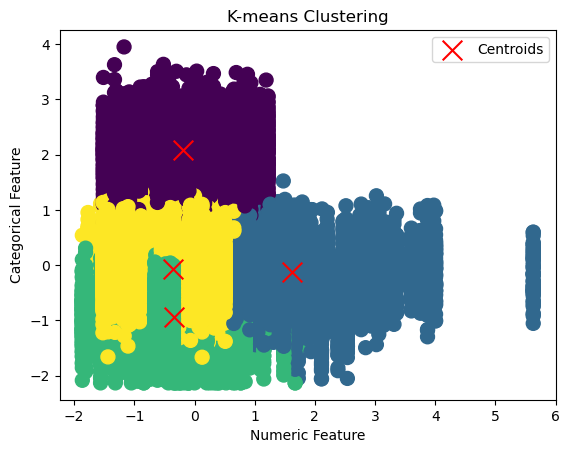

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# K-means 모델 생성
kmeans = KMeans(n_clusters=4, random_state=55) #3,4,5 결과 확인시 4개가 가장 뚜렷하게 구분되어 4개로 결정
kmeans_labels = kmeans.fit_predict(X)
 
# 클러스터링 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200,label='Centroids')
plt.xlabel('Numeric Feature')
plt.ylabel('Categorical Feature')
plt.title('K-means Clustering')
plt.legend()
plt.show()


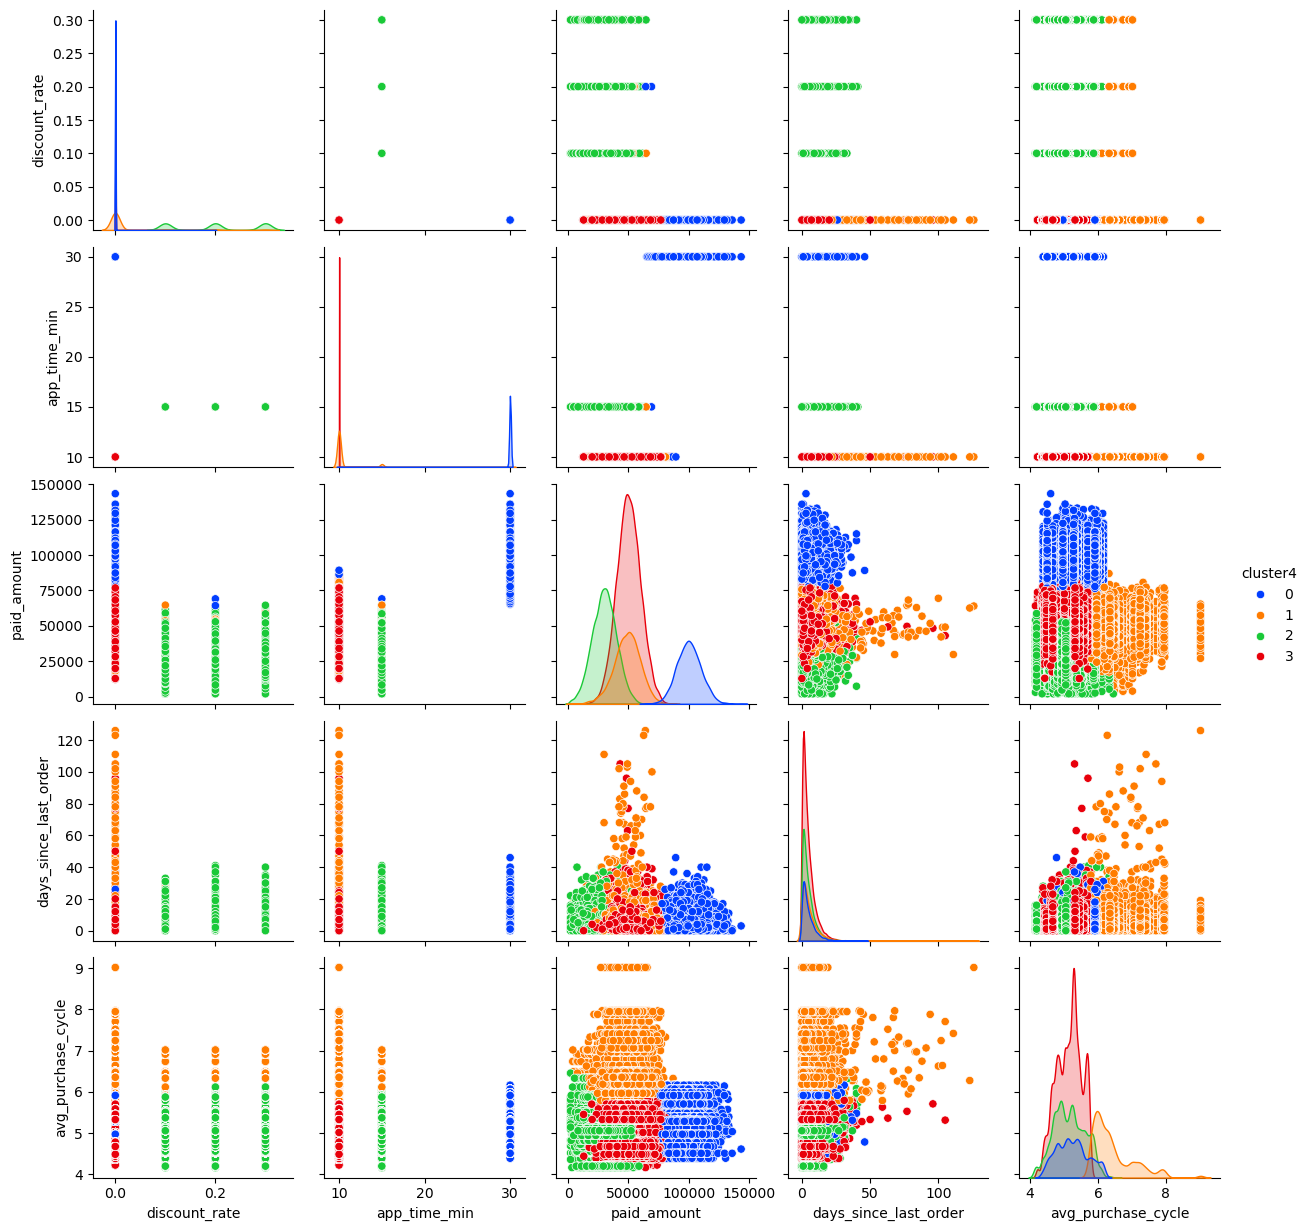

In [26]:
import seaborn as sns
sns.pairplot(logD, hue="cluster4", palette='bright')
plt.show()

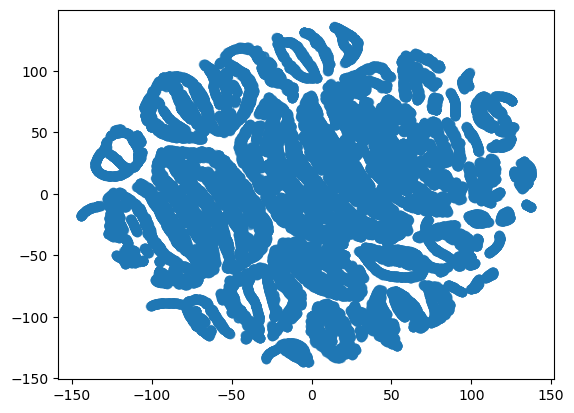

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# 2차원으로 축소하기
tsne = TSNE(n_components = 2, random_state=55)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5);

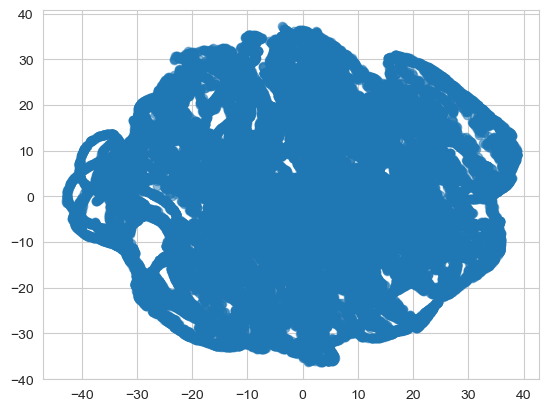

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components = 3, random_state=55)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5);